In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df=pd.read_csv('pruebas.csv')
df.head()

,Unnamed: 0,a,b,c,d,e,f,h,k,l,...,monto,score,fraude,Country_AR,Country_BR,Country_US,Country_UY,Country_otros,hour_early,predict
0,0,4,0.6812,50084.12,50.0,0.000000,20.0,1,0.365475,2479.0,...,57.63,100,0,1,0,0,0,0,0,0.015804
1,1,4,0.6694,66005.49,0.0,0.000000,2.0,1,0.612728,2603.0,...,40.19,25,0,1,0,0,0,0,0,0.006947
2,2,4,0.4718,7059.05,4.0,0.463488,92.0,25,0.651835,2153.0,...,5.77,23,0,0,1,0,0,0,0,0.042368
3,3,4,0.7260,10043.10,24.0,0.046845,43.0,43,0.692728,4845.0,...,40.89,23,0,0,1,0,0,0,0,0.078661
4,4,4,0.7758,16584.42,2.0,0.154616,54.0,0,0.201354,2856.0,...,18.98,71,0,0,1,0,0,0,0,0.013279


In [22]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con las columnas predict, fraude y monto

# Define los valores de costos y ganancias
CFP = 1  # Costo por Fraude Aprobado (100% del dinero de la transacción)
GT = 0.25  # Ganancia por Transacción Legítima (25% del dinero de la transacción)
GFD = 1  # Ganancia por Fraude Detectado (100% del dinero de la transacción)

# Función para calcular la ganancia esperada para un umbral dado
def calcular_ganancia_esperada(df, umbral):
    # Clasifica las transacciones en función del umbral
    df['prediccion'] = (df['predict'] >= umbral).astype(int)

    # Calcula los componentes de la ganancia esperada
    TP = ((df['prediccion'] == 1) & (df['fraude'] == 1)).sum()
    FP = ((df['prediccion'] == 1) & (df['fraude'] == 0)).sum()
    FN = ((df['prediccion'] == 0) & (df['fraude'] == 1)).sum()
    TN = ((df['prediccion'] == 0) & (df['fraude'] == 0)).sum()

    # Calcula la ganancia esperada
    GE = (GT * TN) + (GFD * TP) - (CFP * FP) - (CFP * FN)
    return GE

# Define una lista de umbrales para evaluar
umbrales = np.arange(0,1,0.01)

# Calcula la ganancia esperada para cada umbral y almacénala en una lista
ganancias_esperadas = [calcular_ganancia_esperada(df, umbral) for umbral in umbrales]

# Crea un DataFrame con los resultados
resultados = pd.DataFrame({'Umbral': umbrales, 'GananciaEsperada': ganancias_esperadas})



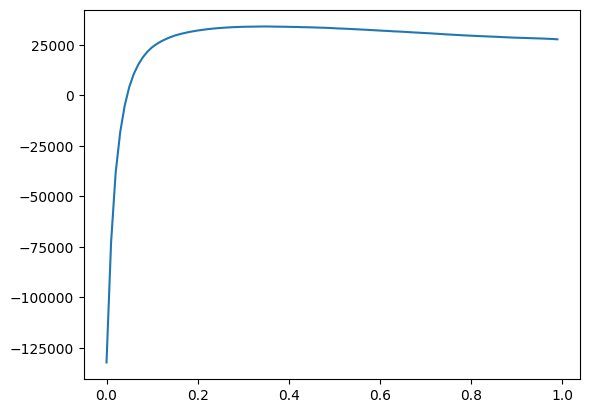

In [25]:
plt.plot(resultados.Umbral  ,resultados.GananciaEsperada)

<Axes: >

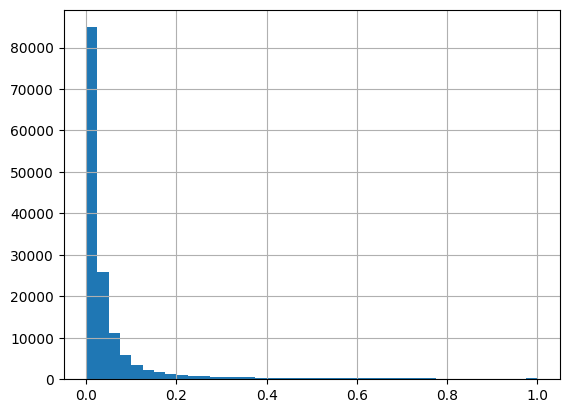

In [28]:
df.predict.hist(bins=40)